In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Data Cleaning and Preparation:

In [104]:
production_metric= pd.read_csv(r'C:\Users\pipec\OneDrive\Documentos\Python Scripts\OEE-Data-Analyst-Project\ProductionMetric.csv')

device_property= pd.read_csv(r'C:\Users\pipec\OneDrive\Documentos\Python Scripts\OEE-Data-Analyst-Project\DeviceProperty.csv')

Quality= pd.read_csv(r'C:\Users\pipec\OneDrive\Documentos\Python Scripts\OEE-Data-Analyst-Project\Quality.csv')
production_metric.head()


,prodmetric_stream_key,deviceKey,start_time,end_time,good_count,reject_count,ideal_time,run_time,unplanned_stop_time,planned_stop_time,unplanned_stop_time.1,performance_impact_display_name,process_state_display_name,process_state_reason_display_name,job_display_name,part_display_name,shift_display_name,team_display_name
0,5552062,Line3,2025-01-29 19:10:14.3284760 -06:00,2025-01-29 19:13:19.6285480 -06:00,0,0,0.000000,0.000000,185.300072,0.0,185.300072,Unplanned Stop,Down,Security Alarm,Part D-4000,Part D,Second Shift,Team 2
1,5552060,Line3,2025-01-29 19:05:37.3369440 -06:00,2025-01-29 19:10:14.3284760 -06:00,96,0,157.363822,276.991532,0.000000,0.0,0.000000,Run,Running,Running Normally,Part D-4000,Part D,Second Shift,Team 2
2,5552046,Line4,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:02:07.0000000 -06:00,54,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part J-4000,Part J,Second Shift,Team 3
3,5552048,Line2,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:34.0000000 -06:00,0,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part M-3000,Part M,Second Shift,Team 3
4,5552049,Line1,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:52.0000000 -06:00,67,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part P-2000,Part P,Second Shift,Team 2


In [105]:
#Let's Start by cleaning the start_time and end_time columns.
production_metric['start_time'] = production_metric['start_time'].str.slice(0, 19)
production_metric['end_time'] = production_metric['end_time'].str.slice(0, 19)

#production_metric['start_time'] = pd.to_datetime(production_metric['start_time'])
print(production_metric['start_time'].head())
#production_metric['end_time'] = pd.to_datetime(production_metric['end_time'], format='%Y-%m-%d %H:%M:%S.%f')

0    2025-01-29 19:10:14
1    2025-01-29 19:05:37
2    2025-01-29 19:00:00
3    2025-01-29 19:00:00
4    2025-01-29 19:00:00
Name: start_time, dtype: object


In [106]:
production_metric['start_time'] = pd.to_datetime(production_metric['start_time'])
production_metric['end_time'] = pd.to_datetime(production_metric['end_time'])
production_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   prodmetric_stream_key              10000 non-null  int64         
 1   deviceKey                          10000 non-null  object        
 2   start_time                         10000 non-null  datetime64[ns]
 3   end_time                           10000 non-null  datetime64[ns]
 4   good_count                         10000 non-null  int64         
 5   reject_count                       10000 non-null  int64         
 6   ideal_time                         10000 non-null  float64       
 7   run_time                           10000 non-null  float64       
 8   unplanned_stop_time                10000 non-null  float64       
 9   planned_stop_time                  10000 non-null  float64       
 10  unplanned_stop_time.1              

In [107]:
#Let's see an overall view of the data.
production_metric.describe(include='all')

,prodmetric_stream_key,deviceKey,start_time,end_time,good_count,reject_count,ideal_time,run_time,unplanned_stop_time,planned_stop_time,unplanned_stop_time.1,performance_impact_display_name,process_state_display_name,process_state_reason_display_name,job_display_name,part_display_name,shift_display_name,team_display_name
count,1.000000e+04,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000,10000,10000,10000,10000
unique,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,7,33,80,16,5,5
top,NaN,Line3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Run,Running,Running Normally,Part F-3000,Part C,Second Shift,Team 2
freq,NaN,3148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5191,5191,5191,299,874,3423,3267
mean,5.479435e+06,NaN,2025-01-23 09:14:27.420699904,2025-01-23 06:57:48.862099968,125.992500,4.806600,214.548388,260.358578,47.296835,14.947512,47.296835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.420532e+06,NaN,2025-01-17 11:05:23,2022-04-28 12:42:39,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.436070e+06,NaN,2025-01-20 04:00:00,2025-01-20 04:02:09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.468328e+06,NaN,2025-01-23 01:17:37.500000,2025-01-23 01:37:46.500000,1.000000,0.000000,1.592000,1.948832,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.540282e+06,NaN,2025-01-26 15:12:21.750000128,2025-01-26 15:18:23,216.000000,7.000000,368.537099,474.560416,69.486368,0.000000,69.486368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.552062e+06,NaN,2025-01-29 19:10:14,2025-01-29 19:13:19,1975.000000,73.000000,3251.916755,3236.308444,809.164892,951.000000,809.164892,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
#I've found anomalies in the data, such as end_time being earlier than start_time.
#Let's check the data for these anomalies.
anomalies = production_metric[production_metric['end_time'] < production_metric['start_time']]
print("Anomalies found:\n", anomalies[['prodmetric_stream_key', 'start_time', 'end_time']])


Anomalies found:
       prodmetric_stream_key          start_time            end_time
481                 5550088 2025-01-29 07:20:41 2025-01-29 07:20:21
5529                5540794 2025-01-22 07:21:08 2022-04-28 12:42:39


In [109]:
#This rows doesn't have sense, so let's drop them.
production_metric = production_metric.drop(anomalies.index)
#Let's check the data again to see if we have any other anomalies.
production_metric.describe(include='all')
#Also, the column 'unplanned_stop_time' is duplicated so let's drop it.
production_metric = production_metric.drop(columns=['unplanned_stop_time.1'])

In [110]:
#Now let's check the next df called quality.
#Let's check the data types and the first rows of the df.
Quality.info()
Quality.head()
Quality.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7170 entries, 0 to 7169
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   quality_stream_key          7170 non-null   int64 
 1   deviceKey                   7170 non-null   object
 2   count                       7170 non-null   int64 
 3   reject_reason_display_name  7170 non-null   object
 4   prodmetric_stream_key       7170 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 280.2+ KB


,quality_stream_key,deviceKey,count,reject_reason_display_name,prodmetric_stream_key
count,7.170000e+03,7170,7170.000000,7170,7.170000e+03
unique,NaN,4,NaN,11,NaN
top,NaN,Line 3,NaN,Reject,NaN
freq,NaN,2216,NaN,1418,NaN
mean,1.782370e+06,NaN,6.702929,NaN,5.478559e+06
std,3.160132e+04,NaN,5.220581,NaN,4.949946e+04
min,1.747744e+06,NaN,1.000000,NaN,5.420541e+06
25%,1.755055e+06,NaN,3.000000,NaN,5.434508e+06
50%,1.771668e+06,NaN,5.000000,NaN,5.467716e+06
75%,1.821710e+06,NaN,9.000000,NaN,5.540174e+06


In [111]:
#After analyzing the count column, I found that everything looks good.
#Let's check the next and last df called device_property.
device_property.info()
device_property.head()
device_property.describe(include='all')
#The data looks good, so we can move further to the next step.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   deviceKey         4 non-null      object
 1   Area              4 non-null      object
 2   DefaultCycleTime  4 non-null      int64 
 3   Enterprise        4 non-null      object
 4   Line              4 non-null      object
 5   Location          4 non-null      object
 6   Operation         4 non-null      object
 7   Plant             4 non-null      object
 8   SubType           4 non-null      object
 9   Type              4 non-null      object
dtypes: int64(1), object(9)
memory usage: 452.0+ bytes


,deviceKey,Area,DefaultCycleTime,Enterprise,Line,Location,Operation,Plant,SubType,Type
count,4,4,4.000000,4,4,4,4,4,4,4
unique,4,4,NaN,1,4,4,4,3,4,4
top,Line1,Assembly-2,NaN,ManuCorp,AssemblyMain,Building G,Advanced Assembly,WestPlant,HighSpeed,Production-Premium
freq,1,1,NaN,4,1,1,1,2,1,1
mean,NaN,NaN,61.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,34.247871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,42.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,62.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,81.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Downtime Analysis

#### 2.1. Calculate total unplanned_stop_time and planned_stop_time. What is the overall proportion of each?

Total stop time:  622443.474034
   Stop Type     Total Time  proportion
0    Planned  149475.123462    0.240142
1  Unplanned  472968.350572    0.759858


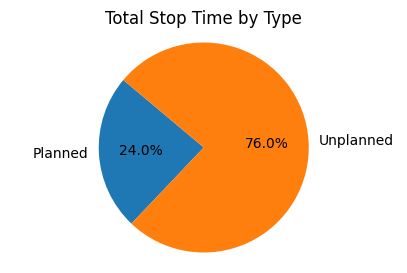

In [112]:

unplanned_stop_time_total = production_metric['unplanned_stop_time'].sum()
planned_stop_time_total = production_metric['planned_stop_time'].sum()
total_stop_time = unplanned_stop_time_total + planned_stop_time_total
print("Total stop time: ", total_stop_time)

#Now Create a frequency table for the stop reason and draw the results.
frequency_table = pd.DataFrame({
    'Stop Type': ['Planned', 'Unplanned'],
    'Total Time': [
        planned_stop_time_total,
        unplanned_stop_time_total
    ]
})
frequency_table['proportion'] = frequency_table['Total Time'] / total_stop_time
print(frequency_table)

#Let's plot the data using seaborn.
plt.figure(figsize=(5, 3))
plt.pie(frequency_table['Total Time'], labels=frequency_table['Stop Type'], autopct='%1.1f%%', startangle=140)
plt.title('Total Stop Time by Type')
plt.axis('equal')  
plt.show()


#### 2.2 Statistically summarize downtime (mean, median, standard deviation, range) per deviceKey (production line). Visualize this comparison (e.g., box plot, bar chart with error bars).

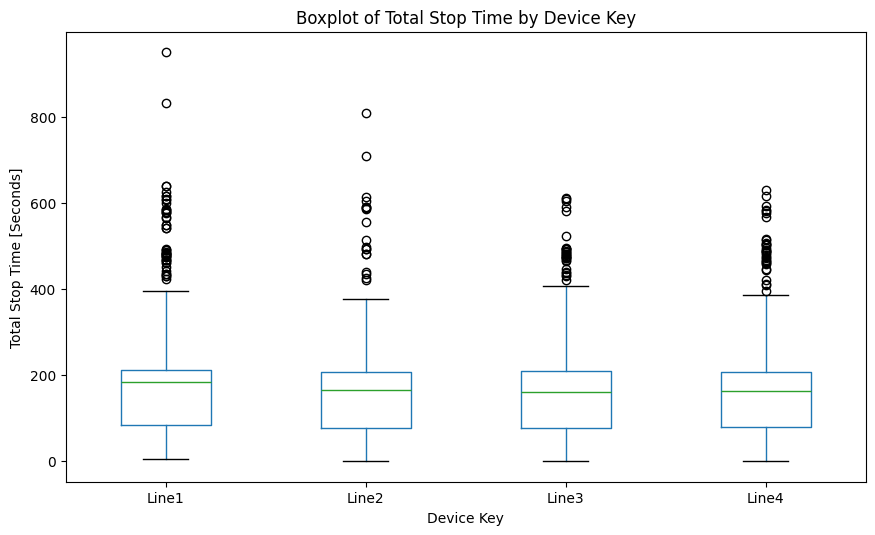

            count        mean         std       min        25%         50%  \
deviceKey                                                                    
Line1      1042.0  176.738994  117.676539  4.302016  83.240789  184.148276   
Line2       561.0  161.255350  110.589235  1.000000  77.000000  164.764422   
Line3      1081.0  160.583242  104.088037  0.276086  77.868325  160.546122   
Line4      1080.0  161.321025  101.311770  0.085998  80.625956  164.238077   

                  75%         max  
deviceKey                          
Line1      213.015715  951.000000  
Line2      207.497882  809.164892  
Line3      210.882815  612.000000  
Line4      207.106202  630.000000  


In [113]:
# Let's create a new df to store the info needed. With this df we can see the downtime by deviceKey.
production_metric.head()

# Add a new column 'total_stop_time' to the production_metric DataFrame
production_metric['total_stop_time'] = production_metric['unplanned_stop_time'] + production_metric['planned_stop_time']

# Filter rows where total_stop_time > 0 and select relevant columns
downtime_df = production_metric[production_metric['total_stop_time'] > 0][['deviceKey', 'total_stop_time']]

# Group the data by deviceKey and create a boxplot for unplanned_stop_time
downtime_df.boxplot(column='total_stop_time', by='deviceKey', grid=False, figsize=(10, 6))
plt.title('Boxplot of Total Stop Time by Device Key')
plt.suptitle('') 
plt.xlabel('Device Key')
plt.ylabel('Total Stop Time [Seconds]')
plt.show()
summarize_perline=downtime_df.groupby('deviceKey')['total_stop_time'].describe()
print(summarize_perline)


#### 2.3 Identify the most frequent process_state_reason_display_name associated with unplanned_stop_time. Visualize the frequency distribution (e.g., Pareto chart/bar chart).

   process_state_reason_display_name  unplanned_stop_time  \
5               Main B Bus Undervolt                62982   
3                   Electrical Fault                57034   
4                                Jam                48106   
0                         Adjustment                43895   
2                    Broken Conveyor                40948   
7                         No Bottles                28859   
14                    Security Alarm                27782   
6                     Missing Reason                26170   
1                          Breakdown                25540   
9                        No Material                25021   
10                       No Operator                24659   
8                            No Caps                20991   
11                     Power Failure                18839   
13                 Random Inspection                12671   
12                     Pressure Leak                 9463   

    cumulative_percenta

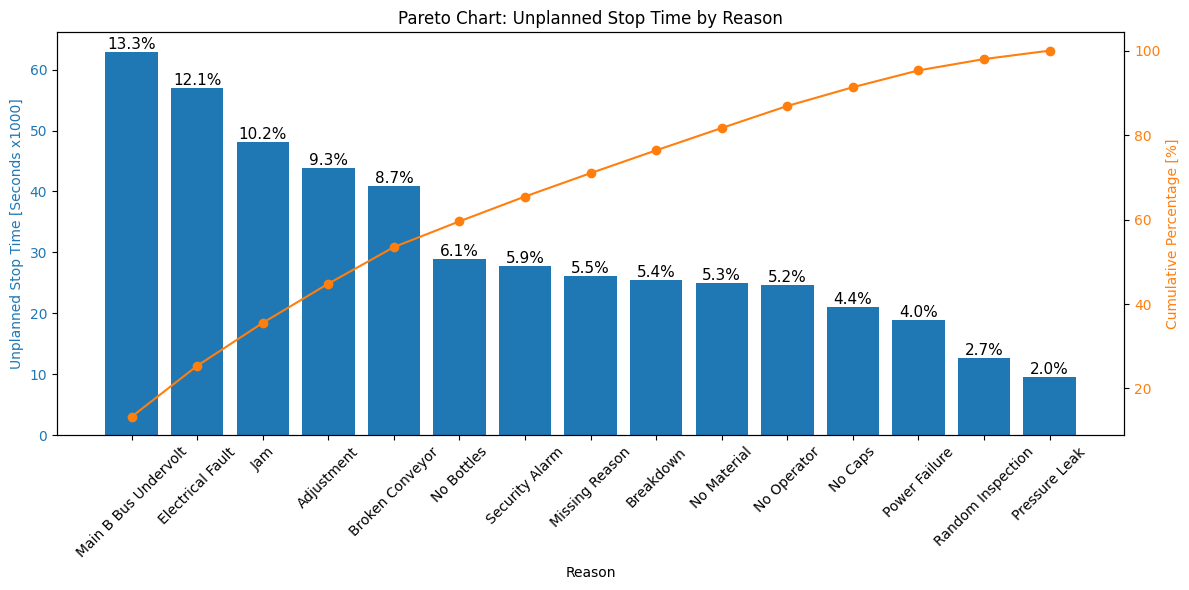

In [114]:
from matplotlib.ticker import FuncFormatter
# Sort the data by unplanned_stop_time in descending order
reason_display_df = reason_display_df.sort_values(by='unplanned_stop_time', ascending=False)

# Calculate cumulative percentage
reason_display_df['cumulative_percentage'] = reason_display_df['unplanned_stop_time'].cumsum() / reason_display_df['unplanned_stop_time'].sum() * 100
print(reason_display_df)
# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for unplanned_stop_time
bars = ax1.bar(reason_display_df['process_state_reason_display_name'], reason_display_df['unplanned_stop_time'], color='C0')
ax1.set_xlabel('Reason')
ax1.set_ylabel('Unplanned Stop Time [Seconds x1000]', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1000)}'))


# Add percentage values on top of each bar
total_unplanned_time = reason_display_df['unplanned_stop_time'].sum()
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_unplanned_time) * 100
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=11)


# Line chart for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(reason_display_df['process_state_reason_display_name'], reason_display_df['cumulative_percentage'], color='C1', marker='o', linestyle='-')
ax2.set_ylabel('Cumulative Percentage [%]', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

# Add a title
plt.title('Pareto Chart: Unplanned Stop Time by Reason')

# Show the plot
plt.tight_layout()
plt.show()

   reject_reason_display_name      count
0         Detected by Max WIP  22.489910
1                      Reject  22.310989
2             Cosmetic Defect   8.833687
3                 Out of Spec   7.999417
4                 Underweight   7.984854
5                  Overweight   7.762244
6                     Scratch   7.614530
7                         xyz   3.932093
8               Bad Packaging   3.836392
9            foreign particle   3.713644
10                   Squished   3.509757


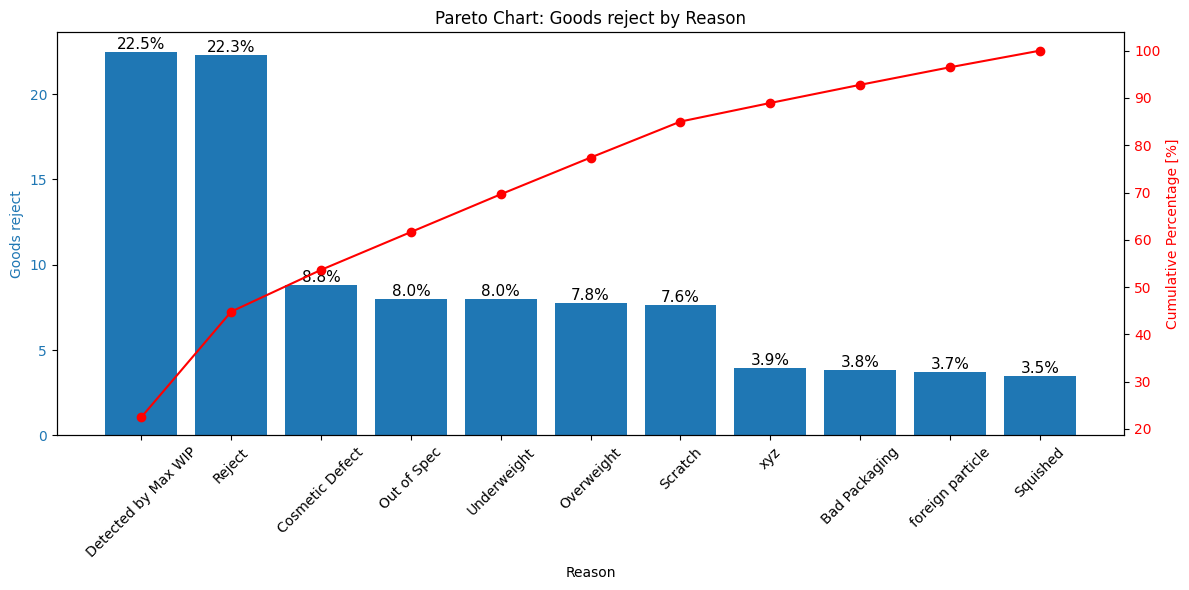

In [115]:
# Reject rate analysis
reject_rate = (Quality.groupby('reject_reason_display_name')['count'].sum() / production_metric['reject_count'].sum()) * 100
reject_rate = reject_rate.sort_values(ascending=False).reset_index()
print(reject_rate)


# Calculate cumulative percentage
reject_rate['cumulative_percentage'] = reject_rate['count'].cumsum() / reject_rate['count'].sum() * 100

# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for reject_reason_display_name
bars = ax1.bar(reject_rate['reject_reason_display_name'], reject_rate['count'], color='C0')
ax1.set_xlabel('Reason')
ax1.set_ylabel('Goods reject', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')
ax1.tick_params(axis='x', rotation=45)
#ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1000)}'))


# Add percentage values on top of each bar
total_unplanned_time = reject_rate['count'].sum()
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_unplanned_time) * 100
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=11)


# Line chart for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(reject_rate['reject_reason_display_name'], reject_rate['cumulative_percentage'], color='red', marker='o', linestyle='-')
ax2.set_ylabel('Cumulative Percentage [%]',color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title
plt.title('Pareto Chart: Goods reject by Reason')

# Show the plot
plt.tight_layout()
plt.show()

## 3. Production & Quality Analysis


#### 3.1 Calculate the overall reject rate (total reject_count / total good_count + reject_count). Note: You may need to aggregate counts from ProductionMetric and potentially link Quality data.

In [116]:

total_reject_count = production_metric['reject_count'].sum()
total_good_count = production_metric['good_count'].sum()

#I don't need to call other tables to get the data, as all the data needed is in the production_metric table.
overall_reject_rate = (total_reject_count / (total_good_count + total_reject_count)) * 100
overall_reject_rate = round(overall_reject_rate, 2)
print(f"Overall Reject Rate: {overall_reject_rate}%")


#Let's check the reject rate by deviceKey.
reject_rate_by_device = production_metric.groupby('deviceKey').agg({'reject_count': 'sum', 'good_count': 'sum'}).reset_index()
reject_rate_by_device['reject_rate'] = (reject_rate_by_device['reject_count'] / (reject_rate_by_device['good_count'] + reject_rate_by_device['reject_count'])) * 100
reject_rate_by_device['reject_rate'] = reject_rate_by_device['reject_rate'].round(2)
reject_rate_by_device = reject_rate_by_device.sort_values(by='reject_rate', ascending=False)
print(reject_rate_by_device)



Overall Reject Rate: 3.67%
  deviceKey  reject_count  good_count  reject_rate
2     Line3         13793      333059         3.98
1     Line2          7314      183279         3.84
3     Line4         14157      362925         3.75
0     Line1         12802      380662         3.25


#### 3.2 Identify the most common reject_reason_display_name from the Quality table. Visualize the frequency distribution.

          Reject Reason  Count
0                Reject   1418
1   Detected by Max WIP   1359
2       Cosmetic Defect    699
3           Out of Spec    630
4           Underweight    627
5            Overweight    622
6               Scratch    602
7                   xyz    323
8      foreign particle    307
9         Bad Packaging    304
10             Squished    279


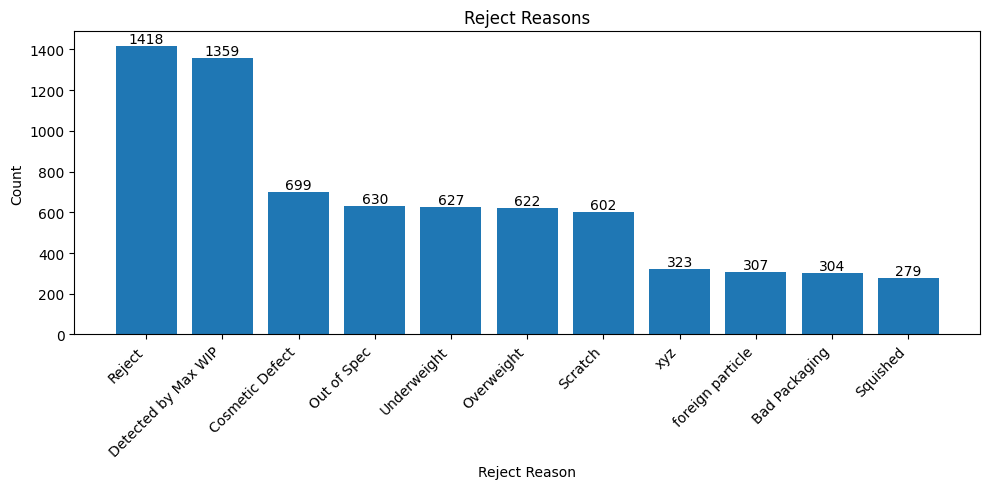

In [117]:
reject_reasons = Quality['reject_reason_display_name'].value_counts()
reject_reasons = reject_reasons.sort_values(ascending=False)
reject_reasons = reject_reasons.reset_index()
reject_reasons.columns = ['Reject Reason', 'Count']
print(reject_reasons)
plt.figure(figsize=(10, 5))
bars = plt.bar(reject_reasons['Reject Reason'], reject_reasons['Count'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=10)


plt.xticks(rotation=45, ha='right')
plt.title('Reject Reasons')
plt.xlabel('Reject Reason')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### 3.3 Compare the average good_count per hour of run_time across different deviceKeys. Are there noticeable differences?

  deviceKey       run_time  good_count  average_good_per_hour
0     Line1  746579.889294      380662                1835.55
1     Line2  376866.959231      183279                1750.76
2     Line3  745580.273952      333059                1608.16
3     Line4  734558.657210      362925                1778.66


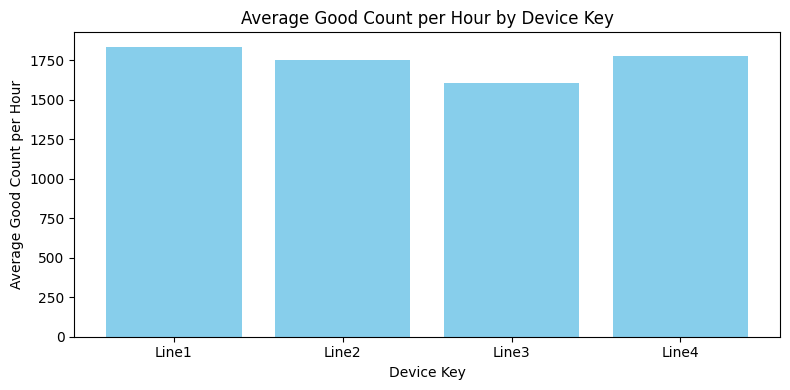

ANOVA result: F-statistic = 25.88922839480035 , p-value = 6.257879418340333e-12


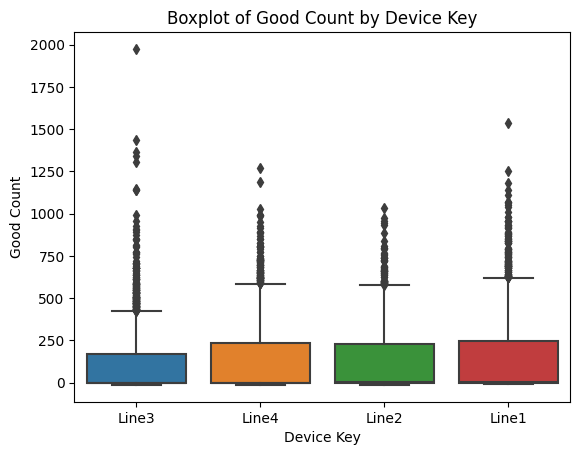

In [118]:
# Group by 'deviceKey' and aggregate 'run_time' and 'good_count'
goods_by_device = production_metric.groupby('deviceKey').agg({'run_time': 'sum', 'good_count': 'sum'}).reset_index()

average_good_per_hour = goods_by_device['good_count'] / (goods_by_device['run_time'] / 3600)  # Convert run_time to hours
goods_by_device['average_good_per_hour'] = average_good_per_hour.round(2)

print(goods_by_device)
plt.figure(figsize=(8, 4))
plt.bar(goods_by_device['deviceKey'], goods_by_device['average_good_per_hour'], color='skyblue')
plt.title('Average Good Count per Hour by Device Key')
plt.xlabel('Device Key')
plt.ylabel('Average Good Count per Hour')
plt.tight_layout()
plt.show()

#In order to answer the question, let's run the ANOVA test (Analysis of Variance) to see if there are significant differences between the means of the groups.
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
Line1 = production_metric[production_metric['deviceKey'] == 'Line1']['good_count']
Line2 = production_metric[production_metric['deviceKey'] == 'Line2']['good_count']
Line3 = production_metric[production_metric['deviceKey'] == 'Line3']['good_count']


anova_result = stats.f_oneway(Line1, Line2, Line3)
print("ANOVA result: F-statistic =", anova_result.statistic, ", p-value =", anova_result.pvalue)
#P-Value < 0.05 indicates that there are significant differences between the means of the groups. Hence, There are noticeable differences between the lines.

sns.boxplot(x='deviceKey', y='good_count', data=production_metric)
plt.title('Boxplot of Good Count by Device Key')
plt.xlabel('Device Key')
plt.ylabel('Good Count')
plt.show()

#### 3.4 Explore potential relationships: Is there a correlation between unplanned_stop_time and reject_count for production periods where both occurred? Visualize this relationship (e.g., scatter plot).

   unplanned_stop_time  reject_count
0                 45.0            10
1                 45.0             2
2                  7.0             9
3                 45.0             2
4                 45.0             2


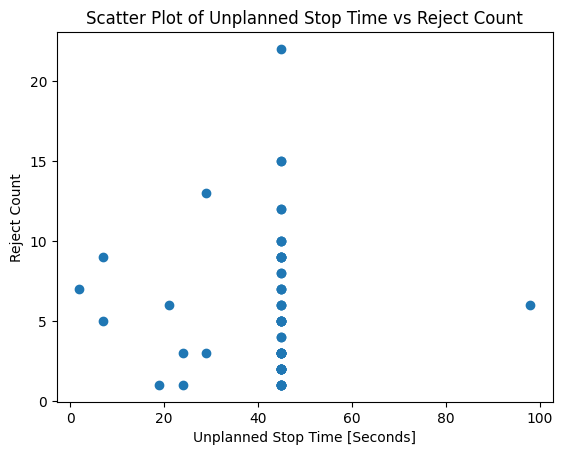

                     good_count  reject_count  ideal_time  run_time  \
good_count             1.000000      0.749274    0.997732  0.977280   
reject_count           0.749274      1.000000    0.768107  0.780033   
ideal_time             0.997732      0.768107    1.000000  0.979608   
run_time               0.977280      0.780033    0.979608  1.000000   
planned_stop_time     -0.133872     -0.111636   -0.132714 -0.136804   
unplanned_stop_time   -0.370880     -0.306880   -0.367158 -0.378472   

                     planned_stop_time  unplanned_stop_time  
good_count                   -0.133872            -0.370880  
reject_count                 -0.111636            -0.306880  
ideal_time                   -0.132714            -0.367158  
run_time                     -0.136804            -0.378472  
planned_stop_time             1.000000            -0.116442  
unplanned_stop_time          -0.116442             1.000000  


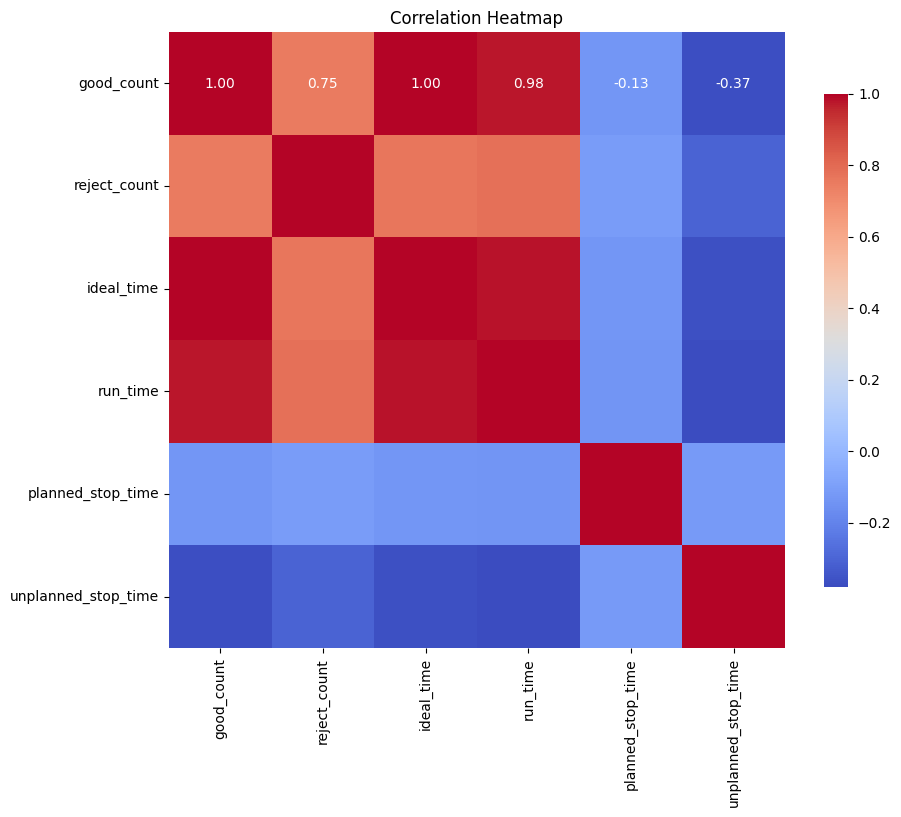

In [119]:
production_metric.head()
df_comparison = production_metric[(production_metric['unplanned_stop_time'] > 0) & (production_metric['reject_count'] > 0)][['unplanned_stop_time', 'reject_count']].reset_index(drop=True)
print(df_comparison.head())

plt.scatter(df_comparison['unplanned_stop_time'],df_comparison['reject_count'])
plt.title('Scatter Plot of Unplanned Stop Time vs Reject Count')
plt.xlabel('Unplanned Stop Time [Seconds]')
plt.ylabel('Reject Count')
plt.show()
#The plot suggests NO apparent correlation between unplanned stop time and reject count.
#Let's check the correlation between all the variables.
# Select only numeric columns for correlation calculation
numeric_columns = production_metric[['good_count', 'reject_count', 'ideal_time', 'run_time', 'planned_stop_time', 'unplanned_stop_time']]
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

## 4. Performance Comparison

#### 4.1 Compare key metrics (e.g., average downtime per shift, average reject rate per shift) across different shift_display_name or team_display_name. Visualize these comparisons.

          Shift  Average Downtime [Seconds]
0   First Shift                  166.862594
1  Second Shift                  163.917115
2   Third Shift                  165.355753
    Shift    Device Key  Avg Good Count  Avg Reject Count
0   Line1   First Shift           356.0              12.0
1   Line1  Second Shift           357.0              14.0
2   Line1   Third Shift           365.0              14.0
3   Line2   First Shift           327.0              14.0
4   Line2  Second Shift           341.0              14.0
5   Line2   Third Shift           324.0              14.0
6   Line3   First Shift           266.0              13.0
7   Line3  Second Shift           257.0              13.0
8   Line3   Third Shift           278.0              13.0
9   Line4   First Shift           338.0              14.0
10  Line4  Second Shift           327.0              15.0
11  Line4   Third Shift           345.0              14.0


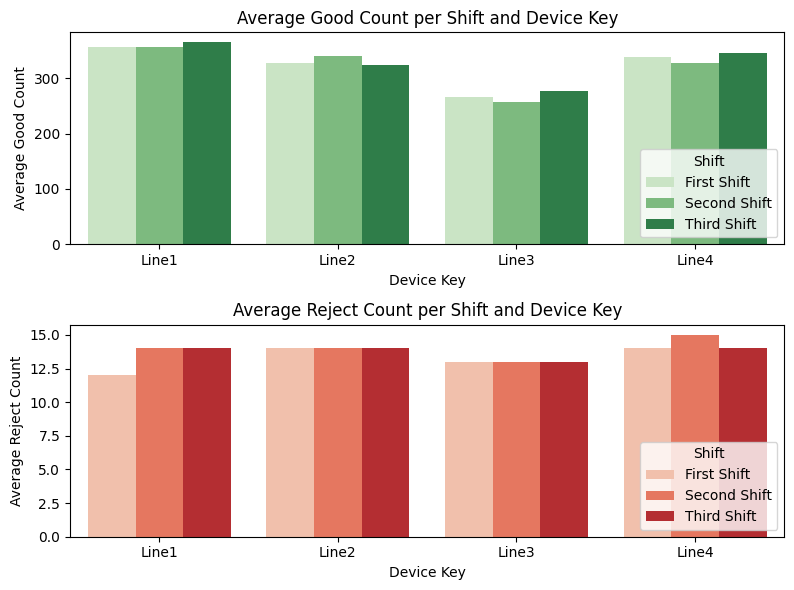

In [120]:
# 1. Average Downtime per Shift

Downtime_Per_Shift = production_metric[production_metric['total_stop_time'] > 0].groupby('shift_display_name')['total_stop_time'].mean().reset_index()
Downtime_Per_Shift.columns = ['Shift', 'Average Downtime [Seconds]']
print(Downtime_Per_Shift)

# 2. Average Good Count per Shift per Device Key 


Average_Good_Count_Per_Shift = production_metric[(production_metric['good_count'] > 0) & (production_metric['reject_count'] > 0)].groupby(['deviceKey','shift_display_name'])[['good_count', 'reject_count']].mean().round().reset_index()
Average_Good_Count_Per_Shift.columns = ['Shift', 'Device Key', 'Avg Good Count', 'Avg Reject Count']

print(Average_Good_Count_Per_Shift)


# bar plot for average good count per shift
plt.figure(figsize=(8,6))
ax = plt.subplot(2, 1, 1)
sns.barplot(
    data=Average_Good_Count_Per_Shift,
    x='Shift',
    y='Avg Good Count',
    hue='Device Key',
    palette='Greens',

)
plt.title('Average Good Count per Shift and Device Key')
plt.xlabel('Device Key')
plt.ylabel('Average Good Count')
plt.legend(title='Shift', loc='lower right')
plt.tight_layout()


ax = plt.subplot(2, 1, 2)
sns.barplot(
    data=Average_Good_Count_Per_Shift,
    x='Shift',
    y='Avg Reject Count',
    hue='Device Key',
    palette='Reds',
)
plt.title('Average Reject Count per Shift and Device Key')
plt.xlabel('Device Key')
plt.ylabel('Average Reject Count')

plt.legend(title='Shift', loc='lower right')
plt.tight_layout()
plt.show()

          Date  Unplanned Stop Time [Hours]
0   2025-01-17                         5.91
1   2025-01-18                        11.93
2   2025-01-19                        11.34
3   2025-01-20                        11.24
4   2025-01-21                        12.84
5   2025-01-22                         9.79
6   2025-01-23                         9.43
7   2025-01-24                         9.00
8   2025-01-25                         9.73
9   2025-01-26                         9.58
10  2025-01-27                         9.22
11  2025-01-28                        11.10
12  2025-01-29                        10.28


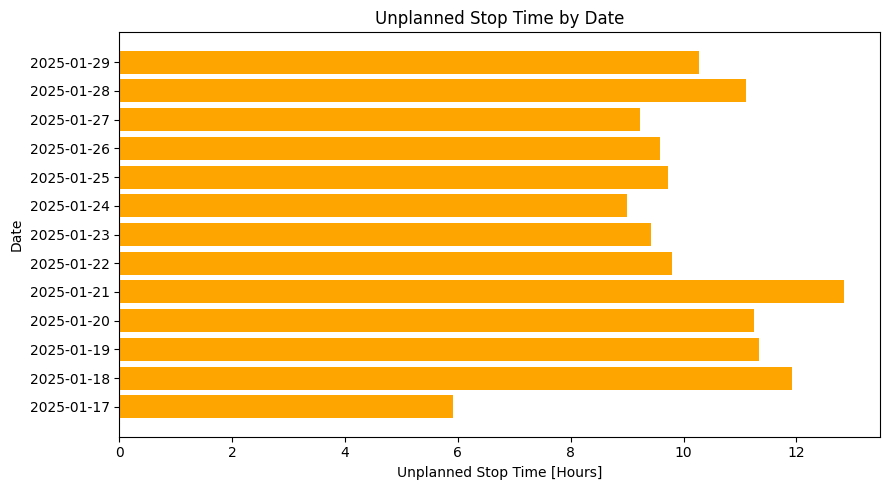

In [121]:
# 3. unplanned stop time daily.
unplanned_stop_time_daily = production_metric.groupby(production_metric['start_time'].dt.date)['unplanned_stop_time'].sum().reset_index()
unplanned_stop_time_daily.columns = ['Date', 'Unplanned Stop Time [Hours]']
unplanned_stop_time_daily['Unplanned Stop Time [Hours]'] = unplanned_stop_time_daily['Unplanned Stop Time [Hours]']/ 3600
unplanned_stop_time_daily['Unplanned Stop Time [Hours]'] = unplanned_stop_time_daily['Unplanned Stop Time [Hours]'].round(2)

print(unplanned_stop_time_daily)

plt.figure(figsize=(9, 5))
plt.barh(unplanned_stop_time_daily['Date'], unplanned_stop_time_daily['Unplanned Stop Time [Hours]'], color='orange')
plt.title('Unplanned Stop Time by Date')
plt.xlabel('Unplanned Stop Time [Hours]')
plt.ylabel('Date')
plt.tight_layout()

# Set all dates as ticks
plt.yticks(unplanned_stop_time_daily['Date'])
plt.show()

In [122]:
#4. reject_reason by display name.
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

merged_data = pd.merge(
    production_metric[['prodmetric_stream_key','part_display_name']],  # Select only the required column from production_metric
    Quality[['prodmetric_stream_key','reject_reason_display_name', 'count']],  # Select only the required columns from Quality
    on='prodmetric_stream_key',  
    how='inner'  
)
merged_data = merged_data.reset_index(drop=True)

print(merged_data.head())
# Dropdown widget for part_display_name
part_selector = widgets.Dropdown(
    options=merged_data['part_display_name'].unique(),
    description='Part:',
    value=merged_data['part_display_name'].unique()[0]
)

# Function to update plot
def update_plot(part):
    filtered = merged_data[merged_data['part_display_name'] == part]
    filtered = filtered.sort_values(by='count', ascending=False)  
    fig = px.bar(filtered, x='reject_reason_display_name', y='count',
                 title=f'Reject Reasons for {part}',
                 labels={'reject_reason_display_name': 'Reject Reason', 'count': 'Count'})
    fig.update_layout(xaxis={'categoryorder': 'total descending'})  
    fig.show()

# Connect widget to function
widgets.interact(update_plot, part=part_selector)




   prodmetric_stream_key part_display_name reject_reason_display_name  count
0                5552053            Part D                    Scratch     12
1                5552039            Part J                     Reject     13
2                5552039            Part J        Detected by Max WIP      6
3                5552028            Part D                Out of Spec      1
4                5552028            Part D                Underweight     11


interactive(children=(Dropdown(description='Part:', options=('Part D', 'Part J', 'Part P', 'Part M', 'Part L',…

<function __main__.update_plot(part)>

## Step 3: Statistical Significance Testing

In [136]:
#Compare mean unplanned stop time between two production lines
mean_unplanned_stop_time_line1 = production_metric[production_metric['deviceKey'] == 'Line1']['unplanned_stop_time'].mean()
mean_unplanned_stop_time_line2 = production_metric[production_metric['deviceKey'] == 'Line2']['unplanned_stop_time'].mean()

print(f"Mean Unplanned Stop Time for Line 1: {mean_unplanned_stop_time_line1} seconds")
print(f"Mean Unplanned Stop Time for Line 2: {mean_unplanned_stop_time_line2} seconds")
# Perform t-test
t_statistic, p_value = stats.ttest_ind(
    production_metric[production_metric['deviceKey'] == 'Line1']['unplanned_stop_time'],
    production_metric[production_metric['deviceKey'] == 'Line2']['unplanned_stop_time']
)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")
#P-Value < 0.05 indicates that there are significant differences between the means of the groups. Hence, There are noticeable differences between the lines.



Mean Unplanned Stop Time for Line 1: 51.576421130192884 seconds
Mean Unplanned Stop Time for Line 2: 49.24199952204836 seconds
T-statistic: 0.8060555385836579, P-value: 0.42025757450206946


ANOVA result: F-statistic = 0.6353299589304214, P-value = 0.5297822125640291
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
 First Shift Second Shift   0.0709 0.9423 -0.4349 0.5767  False
 First Shift  Third Shift   0.2415  0.515 -0.2738 0.7567  False
Second Shift  Third Shift   0.1706 0.7142 -0.3408  0.682  False
---------------------------------------------------------------


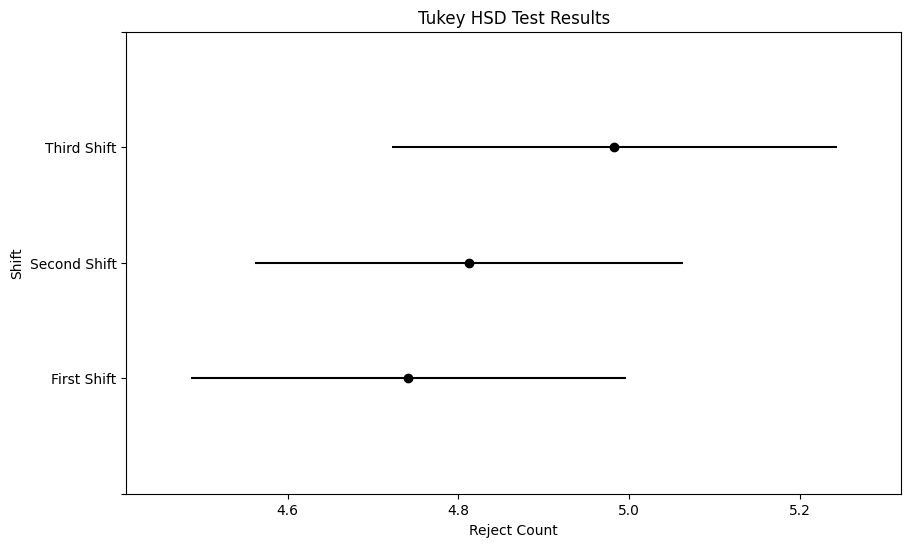

In [137]:
# Test differences in reject rate across shifts
# Perform ANOVA test
# Check the data for each shift
shift1_data = production_metric[production_metric['shift_display_name'] == 'First Shift']['reject_count']
shift2_data = production_metric[production_metric['shift_display_name'] == 'Second Shift']['reject_count']
shift3_data = production_metric[production_metric['shift_display_name'] == 'Third Shift']['reject_count']


# Perform ANOVA test
anova_result = stats.f_oneway(shift1_data, shift2_data, shift3_data)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, P-value = {anova_result.pvalue}")


# Perform Tukey's HSD test for pairwise comparisons
tukey_result = pairwise_tukeyhsd(
    endog=production_metric[production_metric['shift_display_name'].isin(['First Shift', 'Second Shift', 'Third Shift'])]['reject_count'],
    groups=production_metric[production_metric['shift_display_name'].isin(['First Shift', 'Second Shift', 'Third Shift'])]['shift_display_name'],
    alpha=0.05
)
print(tukey_result)
# Plot the results
tukey_result.plot_simultaneous()
plt.title('Tukey HSD Test Results')
plt.xlabel('Reject Count')
plt.ylabel('Shift')
plt.show()

In [139]:
#Spearman correlation between unplanned stop time and reject count
spearman_corr, p_value = stats.spearmanr(production_metric[production_metric['unplanned_stop_time']>0]['unplanned_stop_time'], production_metric[production_metric['unplanned_stop_time']>0]['reject_count'])
print(f"Spearman Correlation: {spearman_corr}, P-value: {p_value}")


Spearman Correlation: -0.19640743488997198, P-value: 1.8138726428944911e-29


Chi-square statistic: 77.57594189776994, P-value: 0.1185500779164122, Degrees of freedom: 64


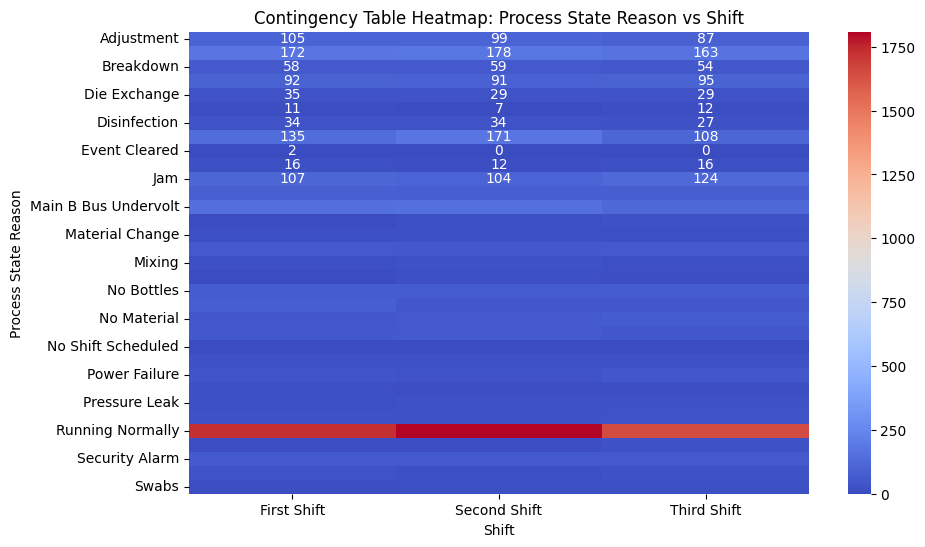

In [145]:
#Chi-square test of independence on the contingency table (process state reason × shift)
contingency_table = pd.crosstab(production_metric[production_metric['shift_display_name'].isin(['First Shift', 'Second Shift', 'Third Shift'])]['process_state_reason_display_name'], production_metric[production_metric['shift_display_name'].isin(['First Shift', 'Second Shift', 'Third Shift'])]['shift_display_name'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}, Degrees of freedom: {dof}")
#plotting heatmap for the contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Contingency Table Heatmap: Process State Reason vs Shift')
plt.xlabel('Shift')
plt.ylabel('Process State Reason')
plt.show()

In [142]:
production_metric.head()

,prodmetric_stream_key,deviceKey,start_time,end_time,good_count,reject_count,ideal_time,run_time,unplanned_stop_time,planned_stop_time,performance_impact_display_name,process_state_display_name,process_state_reason_display_name,job_display_name,part_display_name,shift_display_name,team_display_name,total_stop_time
0,5552062,Line3,2025-01-29 19:10:14,2025-01-29 19:13:19,0,0,0.000000,0.000000,185.300072,0.0,Unplanned Stop,Down,Security Alarm,Part D-4000,Part D,Second Shift,Team 2,185.300072
1,5552060,Line3,2025-01-29 19:05:37,2025-01-29 19:10:14,96,0,157.363822,276.991532,0.000000,0.0,Run,Running,Running Normally,Part D-4000,Part D,Second Shift,Team 2,0.000000
2,5552046,Line4,2025-01-29 19:00:00,2025-01-29 19:02:07,54,0,0.000000,0.000000,0.000000,0.0,Not Scheduled,Meal/Break,Lunch,Part J-4000,Part J,Second Shift,Team 3,0.000000
3,5552048,Line2,2025-01-29 19:00:00,2025-01-29 19:01:34,0,0,0.000000,0.000000,0.000000,0.0,Not Scheduled,Meal/Break,Lunch,Part M-3000,Part M,Second Shift,Team 3,0.000000
4,5552049,Line1,2025-01-29 19:00:00,2025-01-29 19:01:52,67,0,0.000000,0.000000,0.000000,0.0,Not Scheduled,Meal/Break,Lunch,Part P-2000,Part P,Second Shift,Team 2,0.000000
